In [1]:
import pandas as pd

In [19]:
# importing data using pandas
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
# The first 5 rows
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
# The missing values in each column
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [27]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [32]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [ ]:
# Total number of missing values in the dataset
df.isna().sum().sum()

np.int64(120)

Text(0.5, 1.0, 'Missing Values Heatmap')

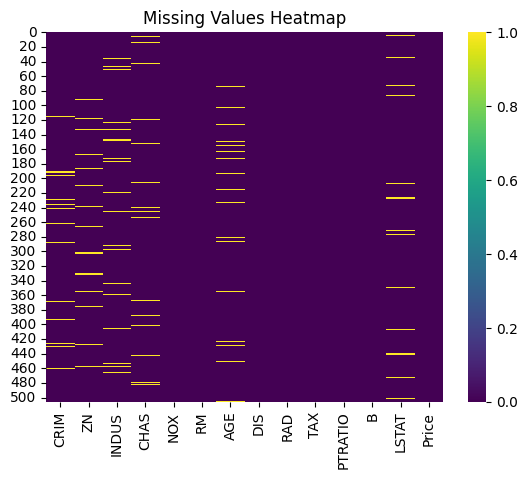

In [40]:
# Visualize the missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cmap='viridis')
plt.title("Missing Values Heatmap")

In [ ]:
# Changing the missing values with the appropriate number, in this instance is median
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].median())
df['ZN'] = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['CHAS'] = df['CHAS'].fillna(0)
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].median())

print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


In [42]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [43]:
# Importing needed libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data set into 2 sections(80 & 20) to train and to test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
# Fitting the split data into LinearRegression model
mod = LinearRegression()
mod.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
# Predicting on test set
y_pred = mod.predict(X_test)

In [46]:
# Defining the functions into the variables
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f"Mean Squared Error (MSE): {mse}; R_2 Score: {r2}")

Mean Squared Error (MSE): 24.99938479010353; R_2 Score: 0.6591013893903488


Text(0.5, 1.0, 'Actual vs Predicted House Prices')

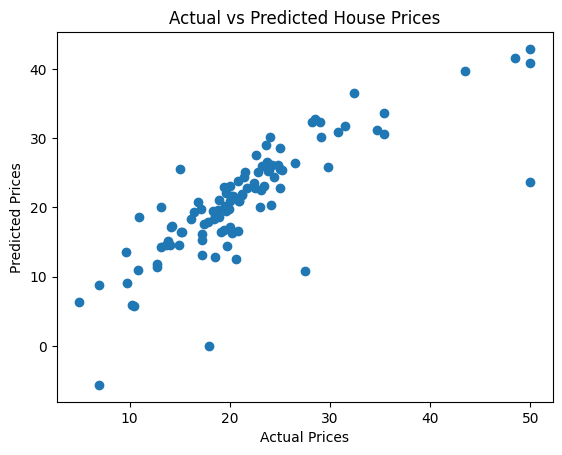

In [48]:
# Visualizing using matplotlib
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

In [51]:
# * * * * * * * Let's try with standard scaler as well * * * * * * * *


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Price"]))

In [52]:
# Defining the targer
y = df["Price"]

In [ ]:
# Deviding into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [55]:
# Uploading Linear Regression model again
mod = LinearRegression()
mod.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
# Predciting on the test set
y_pred = mod.predict(X_test)

In [57]:
# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [58]:
print(f'mse={mse}; r2={r2}')

mse=24.99938479010337; r2=0.659101389390351


In [ ]:
'''
 * * * * Conclusion * * * *

    In this project, a Linear Regression model was developed to predict the housing prices using the .csv file above.
    
    After handling the missing values and even trying with StandardScaler, the following was obtained:
    - R_2 ≈ 0.659
    - MSE (Mean Squared Error) ≈ 25

    These results indicate that our model explains 66% of the variability in houseing prices
'''

'\n * * * * Conclusion * * * *\n\n    In this project, a Linear Regression model was developed to predict the housing prices using the .csv file above.\nAfter handling the missing values and even trying with StandardScaler, the following was obtained:\n    - R_2 ≈ 0.659\n    - MSE (Mean Squared Error) ≈ 25\n\n    These results indicate that our model explains 66% of the variability in houseing prices\n'